In [1]:
import sys
parent_path = "/home/jan/Documents/masterthesis/project/mucus"
sys.path.append(parent_path)

import numpy as np
from polymer import Config, Polymer
import toml
import matplotlib.pyplot as plt
from numba import njit
from time import time
from datetime import timedelta
from copy import deepcopy

In [4]:
def create_wind(nc, d):
    nch = nc//2
    lb = d*nc

    pc1 = np.array((np.arange(nc)*d, np.zeros(nc),np.zeros(nc))).T
    pc1 += (0, nc, nc)

    pc2 = np.zeros((nc, 3))
    pc2[:nch, 1] = np.arange(nch)*d
    pc2[:nch, 2] += d

    pc2[nch, 1] = pc2[nch-1, 1]
    pc2[nch+1, 1] = pc2[nch-1, 1]
    pc2[nch+1, 2] = -d

    pc2[nch+2:, 1] = d*np.fliplr([np.arange(nch-2)]) + d
    pc2[nch+2:, 2] -= d 

    pc2 += (nc, nch, nc)

    p = np.append(pc1, pc2, axis=0)
    #plot_box(p, lb)
    return p

def plot_box(positions, l_box):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    for i in range(len(positions)):
        ax.scatter(positions[i, 0],positions[i, 1], positions[i, 2])
    
    xy = np.array(((0,0),
                    (l_box, 0),
                    (l_box, l_box),
                    (0, l_box),
                    (0,0)))

    

    ax.plot(xy[:, 0], xy[:, 1], zs=0, zdir='z', c="r")
    ax.plot(xy[:, 0], xy[:, 1], zs=l_box, zdir='z', c="r")
    ax.plot(xy[:, 0], xy[:, 1], zs=0, zdir='y', c="r")
    ax.plot(xy[:, 0], xy[:, 1], zs=l_box, zdir='y', c="r")

In [16]:
cfg_fname = '/home/jan/Documents/masterthesis/project/mucus/configs/cfg_chain_testForces_50beads_1Msteps_3.toml'

def delete_lbox(cfg_fname):
    f = open(cfg_fname)
    output = ""
    for line in f:
        if line != "lbox = None\n":
            output += line
    f.close()

    f = open(cfg_fname, "w")
    f.write(output)
    f.close()
    return

delete_lbox(cfg_fname)

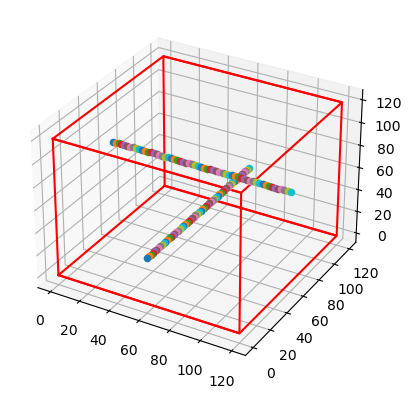

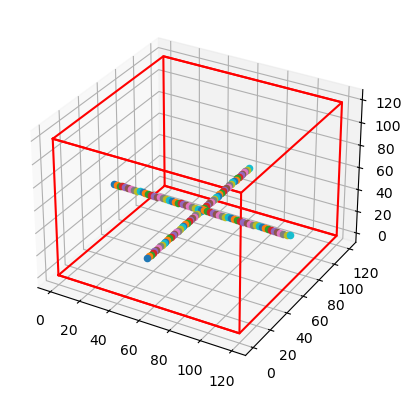

In [8]:
# create config of two chains (1) close to each other and (2) already a little intertwined

#fname_traj = '/home/jan/Documents/masterthesis/project/mucus/trajectories/traj_test_time_nbeads_0.gro'
fname_cfg = '/home/jan/Documents/masterthesis/project/mucus/configs/cfg_test_twoChains.toml'

cfg = Config.from_toml(fname_cfg)
p = Polymer(cfg)
p.create_box()

pos = create_wind(60, 2)
# pos = p.positions
# plot_box(pos, 120)
# pos[60:, 2] -= 38
# plot_box(pos, 120)


p.set_positions(pos)

# plot_box(p.positions, p.box_length)

p.simulate()
p.save_traj_gro()

[[56 54 52 50 48 46 44 42 40 38 36 34 32 30 28 26 24 22 20 18 16 14 12 10
   8  6  4  2  0]]
(120, 3)


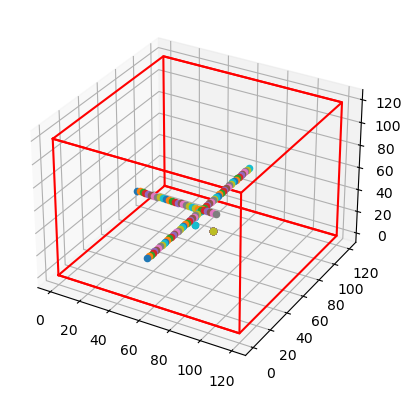

In [56]:
# (2) winding chains
pos_wind = pos_close[60:]

nh = 30
d = 2
ax = 0
ax2 = 2

# nh = 5
# d = 2
# ax = 1
# ax2 = 2

# shift frist half of chain by 2d

# pos_wind = np.array((np.arange(10), np.zeros(10), np.zeros(10))).T
# pos_wind = np.array((np.zeros(10), np.arange(10), np.zeros(10))).T
# plot_box(pos_wind, 10)
pos_wind[nh+1:, ax] = pos_wind[:nh-1, ax] + d*np.fliplr([np.arange(len(pos_wind[:nh-1, ax]))])
print(d*np.fliplr([np.arange(len(pos_wind[:nh-1, ax]))]))

pos_wind[:nh-2, ax] = pos_wind[:nh-2, ax] + 2*d

# set ax positions of last two of frist half to pos(nh-2)
pos_wind[nh-1, ax] = pos_wind[nh-2, ax]
pos_wind[nh, ax] = pos_wind[nh-2, ax]

# set ax2 positions of last two of first half to pos-d, pos-2d 
pos_wind[nh-1, ax2] = pos_wind[nh-1, ax2] - d
pos_wind[nh, ax2] = pos_wind[nh, ax2] - 2*d

# set position of last chain to pos(ax2) = pos(ax2-2d)
pos_wind[nh+1:, ax2] = pos_wind[nh+1:, ax2] - 2*d

pos_wind = np.append(pos_close[:60], pos_wind, axis=0)

print(np.shape(pos_wind))
# print(pos_wind)

plot_box(pos_wind, p.box_length)
# plot_box(pos_wind, 10)

In [2]:
def create_wind(nc, d):
    nch = nc//2
    lb = d*nc

    pc1 = np.array((np.arange(nc)*d, np.zeros(nc),np.zeros(nc))).T
    pc1 += (0, nc, nc)

    pc2 = np.zeros((nc, 3))
    pc2[:nch, 1] = np.arange(nch)*d
    pc2[:nch, 2] += d

    pc2[nch, 1] = pc2[nch-1, 1]
    pc2[nch+1, 1] = pc2[nch-1, 1]
    pc2[nch+1, 2] = -d

    pc2[nch+2:, 1] = d*np.fliplr([np.arange(nch-2)])
    pc2[nch+2:, 2] -= d 

    pc2 += (nc, nch, nc)

    p = np.append(pc1, pc2, axis=0)
    #plot_box(p, lb)
    return p

In [10]:
def delete_lbox(cfg_fname):
    f = open(cfg_fname)
    output = ""
    for line in f:
        if line != "lbox = None\n":
            output += line
    f.close()

    f = open(cfg_fname, "w")
    f.write(output)
    f.close()
    return

def distances(traj):
    n = len(traj[0]) # number of atoms
    distances = np.zeros((1, n , n))
    
    r_left = np.tile(traj[0], (n, 1, 1)) # repeats vector along third dimension len(a) times
    r_right = np.reshape(np.repeat(traj[0], n, 0), (n, n, 3)) # does the same but "flipped"

    directions = r_left - r_right # this is right considering the mesh method. dir[i, j] = r_j - r_i
    distances[0] = np.linalg.norm(directions, axis=2)
    
    for frame in traj[1:]:
        r_left = np.tile(frame, (n, 1, 1)) # repeats vector along third dimension len(a) times
        r_right = np.reshape(np.repeat(frame, n, 0), (n, n, 3)) # does the same but "flipped"

        directions = r_left - r_right # this is right considering the mesh method. dir[i, j] = r_j - r_i
        distances = np.append(distances, [np.linalg.norm(directions, axis=2)], axis=0)
        
    return distances

# calculate rdf
name = 'chain_testForces_50beads_1Msteps'
dir_data = '/storage/janmak98/masterthesis'
i = 3

cfg_fname = f'/home/jan/Documents/masterthesis/project/mucus/configs/cfg_{name:s}_{i:d}.toml'
traj_fname = f'/home/jan/Documents/masterthesis/project/mucus/trajectories/traj_{name:s}_{i:d}.gro'
dist_fname = f'/home/jan/Documents/masterthesis/project/mucus/distances/test/dist_{name:s}_{i:d}.npy'

# in .py
cfg_fname = f'{dir_data:s}/configs/box/test/cfg_{name:s}_{i:d}.toml'
traj_fname = f'{dir_data:s}/trajectories/box/test/traj_{name:s}_{i:d}.gro'
dist_fname = f'{dir_data:s}/distances/box/test/dist_{name:s}_{i:d}.npy'


delete_lbox(cfg_fname)

cfg = Config.from_toml(cfg_fname)
p = Polymer(cfg)
p.load_traj_gro(traj_fname, overwrite=True)

d = distances(p.trajectory[:100])
np.save(dist_fname, d)



In [21]:
# make the .py


['/storage/janmak98/masterthesis/configs/box/test/cfg_box_twoChains_140beads_2Msteps.toml', '/storage/janmak98/masterthesis/configs/box/test/cfg_chain_testForces_50beads_1Msteps_0.toml', '/storage/janmak98/masterthesis/configs/box/test/cfg_chain_testForces_50beads_1Msteps_1.toml', '/storage/janmak98/masterthesis/configs/box/test/cfg_chain_testForces_50beads_1Msteps_2.toml', '/storage/janmak98/masterthesis/configs/box/test/cfg_chain_testForces_50beads_1Msteps_3.toml', '/storage/janmak98/masterthesis/configs/box/test/cfg_box_testCharges_100beads_1Msteps_0.toml', '/storage/janmak98/masterthesis/configs/box/test/cfg_box_testCharges_100beads_1Msteps_1.toml', '/storage/janmak98/masterthesis/configs/box/test/cfg_box_testCharges_100beads_1Msteps_2.toml', '/storage/janmak98/masterthesis/configs/box/test/cfg_box_testCharges_100beads_1Msteps_3.toml']
['/storage/janmak98/masterthesis/trajectories/box/test/traj_box_twoChains_140beads_2Msteps.gro', '/storage/janmak98/masterthesis/trajectories/box/te

In [19]:
# calculate radial distribution function
# @njit
def distances(traj):
    n = len(traj[0]) # number of atoms
    distances = np.zeros((1, n , n))
    
    r_left = np.tile(traj[0], (n, 1, 1)) # repeats vector along third dimension len(a) times
    r_right = np.reshape(np.repeat(traj[0], n, 0), (n, n, 3)) # does the same but "flipped"

    directions = r_left - r_right # this is right considering the mesh method. dir[i, j] = r_j - r_i
    distances[0] = np.linalg.norm(directions, axis=2)
    
    for frame in traj[1:]:
        r_left = np.tile(frame, (n, 1, 1)) # repeats vector along third dimension len(a) times
        r_right = np.reshape(np.repeat(frame, n, 0), (n, n, 3)) # does the same but "flipped"

        directions = r_left - r_right # this is right considering the mesh method. dir[i, j] = r_j - r_i
        distances = np.append(distances, [np.linalg.norm(directions, axis=2)], axis=0)
        
t1 = time()
d = distances(p.trajectory[:10000])
t2 = time()



print(timedelta(t2-t1))

302 days, 10:27:55.188446


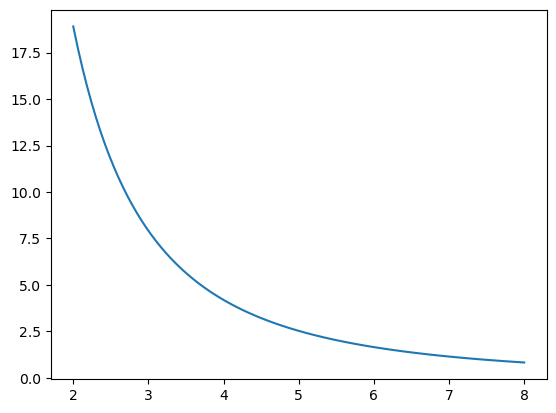

In [20]:
# plot debye energy
c = 10 # mM
r0 = 0.1905 # nm

#rescaled parameters
lB = 36.737
q = 1.524
k_inv = np.sqrt(c)*r0/10 # r0^-1

r = np.linspace(2, 8, 100)

def Udeb(r):
    return q**2*lB*np.exp(-k_inv*r)/r**2



plt.figure()
plt.plot(r, Udeb(r))
plt.show()

In [21]:
def n_PEG(m):
    """
    m...PEG molecular wight in kDa
    """
    m = m/(6.022e20) # g
    nA = 6.02214076e23
    n = (m*nA-18.02)/44.05
    return n

#print(n_PEG(1000))

nA = 6.02214076e23
g2kDa = 6.022e20
m_1 = 44.05 # g mass of one monomere

In [22]:
def n2L(n, c):
    nA = 6.02214076e23
    lbox = (44.05*n/(nA*0.997e4*c))**(1/3)*1e10/2.6
    
    return lbox

n = 120
print("1%", n2L(n, 0.01))
print("2%", n2L(n, 0.02))
print("4%", n2L(n, 0.04))

1% 171.10144792832097
2% 135.8033092173494
4% 107.78715795619155


In [23]:
path = "/home/jan/Documents/masterthesis/project/mucus/config.toml"
config = Config.from_toml(path)
data = toml.load(open(path, encoding="UTF-8"))
print(data)
config = Config.from_dict(data)
print(config)

{'steps': 1000, 'stride': 50, 'nbeads': 10, 'nchains': 6, 'number_of_beads': 60, 'mobility': 5e-05, 'fname_sys': '/home/jan/Desktop', 'fname_traj': '/home/jan/Desktop', 'c_S': 40}
steps=1000 stride=50 number_of_beads=60 nbeads=10 nchains=6 mobility=5e-05 rbead=1.0 qbead=1.524 force_constant=100.0 epsilon_LJ=0.25 sigma_LJ=2.0 cutoff_LJ=2.0 lB_debye=36.737 c_S=40.0 cutoff_debye=None lbox=None pbc=True cutoff_pbc=None save_traj=True write_traj=True cwd='/home/jan/Documents/masterthesis/project/mucus/test_skripts' fname_traj='/home/jan/Desktop' fname_sys='/home/jan/Desktop' simulation_time=None bonds=None


In [24]:
cfg_path = "/home/jan/Documents/masterthesis/project/mucus/configs/tests"

for i in range(6):
    fin = cfg_path + f"/cfg_test_time_nbeads_{i:d}.toml"
    x = open(fin, encoding="UTF-8")
    out = toml.load(x)
    print(x)

FileNotFoundError: [Errno 2] No such file or directory: '/home/jan/Documents/masterthesis/project/mucus/configs/tests/cfg_test_time_nbeads_0.toml'

In [ ]:
# CREATE CONFIG FILES FOR TESTING

#config_dict = {'steps': 100, 'stride': 50, 'nbeads': 10, 'nchains': 8, 'mobility': 5e-05, 'fname_sys': "'a/b/c.txt'", 'fname_traj': None}
config_dict = {'steps': 5000, 'stride': 50, 'nbeads': 10, 'nchains': 8, 'mobility': 5e-05}

nm = ((6, 6), (10, 8), (10, 16), (12, 36), (20, 36), (11, 91))

pathout = "/home/jan/Documents/masterthesis/project/mucus/configs/tests"

for i, k in enumerate(nm):
    config_dict["nbeads"] = k[0]
    config_dict["nchains"] = k[1]
    config_dict["fname_sys"] = f"'/home/janmak98/mucus/configs/cfg_test_time_nbeads_{i:d}.toml'"
    config_dict["fname_traj"] = f"'/storage/janmak98/masterthesis/trajectories/box/test/traj_test_time_nbeads_{i:d}.gro'"
    config_dict["cwd"] = "'/home/janmak98/mucus'"
    output = ""
    for key in config_dict:
        output += f"{key:s} = {config_dict[key]}\n"
    
    fout = pathout + f"/cfg_test_time_nbeads_{i:d}.toml"

    f = open(fout, "w")
    f.write(output)
    f.close()
    
    #cfg = Config.from_dict(config_dict)
    #print(cfg)
    #cfg.save_config(fout)
    


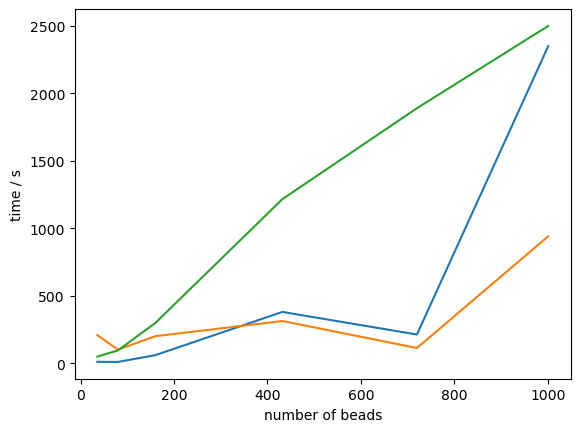


Number of beads
[36, 80, 160, 432, 720, 1001]

Simulation time in minutes
[ 0.17098269  0.1571634   0.99199353  6.32884361  3.5414225  39.14664487]

Particle density of the system in r0^-3
[0.020833333333333332, 0.01, 0.02, 0.03125, 0.01125, 0.09400826446280992]

Time to simulate system scaled up to 1000 particles and 1e7 steps in hours
[ 15.83173025   6.54847489  20.66653197  48.83366986  16.39547453
 130.35845779]


In [ ]:
# plot simulation times
time = list(())
nbeads = list(())
rhobox = list(())
for i in range(6):
    path = f'/home/jan/Documents/masterthesis/project/mucus/configs/cfg_test_time_nbeads_{i:d}.toml'
    data = toml.load(open(path, encoding="UTF-8"))
    time.append(data["simulation_time"])
    nbeads.append(data["nbeads"]*data["nchains"])
    rhobox.append(data["nbeads"]*data["nchains"]/data["lbox"]**3)

plt.figure()
plt.plot(nbeads, time)
plt.plot(nbeads, np.array(rhobox)*10000)
plt.plot(nbeads, time/(np.array(rhobox)*10))
plt.xlabel("number of beads")
plt.ylabel("time / s")
plt.show()
print("\nNumber of beads")
print(nbeads)
print("\nSimulation time in minutes")
print(np.array(time)/60)
print("\nParticle density of the system in r0^-3")
print(rhobox)
print("\nTime to simulate system scaled up to 1000 particles and 1e7 steps in hours")
print(np.array(time)/60/60*1000/np.array(nbeads)*1e6/5000)

36
80
160
432
720
1001
10


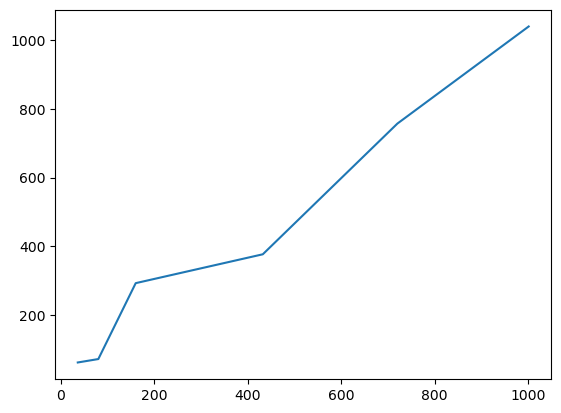

In [ ]:
# create different config files, that are loaded into the class with a loop

config_dict = {'steps': 10000, 'stride': 50, 'nbeads': 10, 'nchains': 8, 'mobility': 5e-05}

nm = ((6, 6), (10, 8), (10, 16), (12, 36), (20, 36), (11, 91))

for k in nm:
    n = k[0]
    m = k[1]
    print(n*m)

print(config_dict['nbeads'])
xy = np.array(nm)
plt.plot(xy[:, 0]*xy[:, 1],xy[:, 0]*xy[:, 1]+100*np.random.randn(*np.shape(xy[:,1])))


In [ ]:
x = np.array(((1, 2),(3,4),(5,6)))

L = list((True, False, True))
print(np.logical_not(L))

print(x[L])
print(x[np.logical_not(L)])

[False  True False]
[[1 2]
 [5 6]]
[[3 4]]
